# Plasma

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from utils.Architectures import FNN
from utils.UPINN import UPINN

### Load data

In [2]:
data_files = np.load('../data/100134_1.8MW_55s_aaro_5_3.npz', allow_pickle=True)
data = {key: data_files[key] for key in data_files.files}

In [3]:
sol = data['sol'][()]
ne = sol['ne']
psin = sol['x']
t = sol['t']

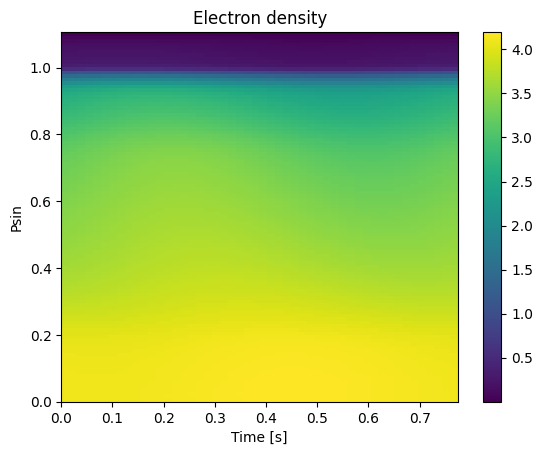

In [4]:
# Plot the data
plt.figure()
plt.imshow(ne, aspect='auto', origin='lower', extent=[t[0], t[-1], psin[0], psin[-1]])
plt.colorbar()
plt.xlabel('Time [s]')
plt.ylabel('Psin')
plt.title('Electron density')
plt.show()

In [5]:
T, PSIN = np.meshgrid(t, psin)
X = np.vstack((T.flatten(), PSIN.flatten())).T
Y = ne.flatten().reshape(-1, 1)
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

### Fit NN

In [6]:
u = FNN([2, 20, 20, 20, 1])
model = UPINN(u, data_points=(X, Y))

[Info]: Initializing NN model (Known dynamics F unspecified; Setting F and G to 0.0)


In [7]:
model.train_loop(epochs=10000)

[Info]: Beginning training...
[Info]: Running on: cuda


100%|██████████| 10000/10000 [00:38<00:00, 260.41it/s, loss=1.57e-04, init_loss=0.00e+00, bc_loss=0.00e+00, data_loss=1.57e-04, pde_loss=0.00e+00]

[Info]: Training complete.
[Info]: Moving model to CPU...


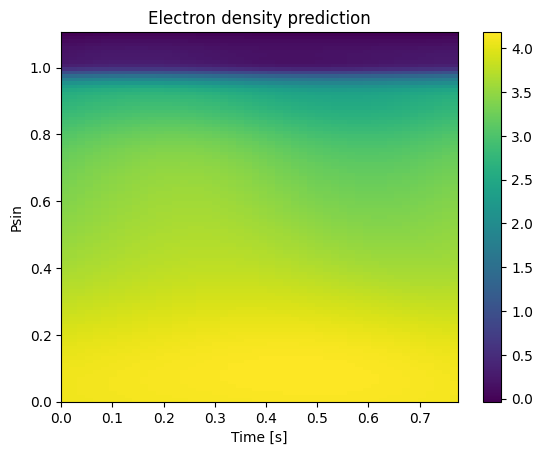

In [8]:
prediction = model.predict(X).detach().numpy().reshape(ne.shape)

plt.figure()
plt.imshow(prediction, aspect='auto', origin='lower', extent=[t[0], t[-1], psin[0], psin[-1]])
plt.colorbar()
plt.xlabel('Time [s]')
plt.ylabel('Psin')
plt.title('Electron density prediction')
plt.show()